<a href="https://colab.research.google.com/github/AnikaZN/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/Anika_Nacey_LS_DS_114_Making_Data_backed_Assertions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science - Making Data-backed Assertions

This is, for many, the main point of data science - to create and support reasoned arguments based on evidence. It's not a topic to master in a day, but it is worth some focused time thinking about and structuring your approach to it.

## Lecture - generating a confounding variable

The prewatch material told a story about a hypothetical health condition where both the drug usage and overall health outcome were related to gender - thus making gender a confounding variable, obfuscating the possible relationship between the drug and the outcome.

Let's use Python to generate data that actually behaves in this fashion!

In [0]:
import random
import numpy as np
dir(random)  # Reminding ourselves what we can do here

['BPF',
 'LOG4',
 'NV_MAGICCONST',
 'RECIP_BPF',
 'Random',
 'SG_MAGICCONST',
 'SystemRandom',
 'TWOPI',
 '_BuiltinMethodType',
 '_MethodType',
 '_Sequence',
 '_Set',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '_acos',
 '_bisect',
 '_ceil',
 '_cos',
 '_e',
 '_exp',
 '_inst',
 '_itertools',
 '_log',
 '_pi',
 '_random',
 '_sha512',
 '_sin',
 '_sqrt',
 '_test',
 '_test_generator',
 '_urandom',
 '_warn',
 'betavariate',
 'choice',
 'choices',
 'expovariate',
 'gammavariate',
 'gauss',
 'getrandbits',
 'getstate',
 'lognormvariate',
 'normalvariate',
 'paretovariate',
 'randint',
 'random',
 'randrange',
 'sample',
 'seed',
 'setstate',
 'shuffle',
 'triangular',
 'uniform',
 'vonmisesvariate',
 'weibullvariate']

In [0]:
# Let's think of another scenario:
# We work for a company that sells accessories for mobile phones.
# They have an ecommerce site, and we are supposed to analyze logs
# to determine what sort of usage is related to purchases, and thus guide
# website development to encourage higher conversion.

# The hypothesis - users who spend longer on the site tend
# to spend more. Seems reasonable, no?

# But there's a confounding variable! If they're on a phone, they:
# a) Spend less time on the site, but
# b) Are more likely to be interested in the actual products!

# Let's use namedtuple to represent our data

from collections import namedtuple
# purchased and mobile are bools, time_on_site in seconds
User = namedtuple('User', ['purchased','time_on_site', 'mobile'])

example_user = User(False, 12, False)
print(example_user)

User(purchased=False, time_on_site=12, mobile=False)


In [0]:
# And now let's generate 1000 example users
# 750 mobile, 250 not (i.e. desktop)
# A desktop user has a base conversion likelihood of 10%
# And it goes up by 1% for each 15 seconds they spend on the site
# And they spend anywhere from 10 seconds to 10 minutes on the site (uniform)
# Mobile users spend on average half as much time on the site as desktop
# But have three times as much base likelihood of buying something

users = []

for _ in range(250):
  # Desktop users
  time_on_site = np.random.normal(420, 100) #x = avg time, y = stdev
  purchased = random.random() < 0.1 + (time_on_site / 1500)
  users.append(User(purchased, time_on_site, False))
  
for _ in range(750):
  # Mobile users
  time_on_site = np.random.normal(300, 90)
  purchased = random.random() < 0.3 + (time_on_site / 1500)
  users.append(User(purchased, time_on_site, True))
  
random.shuffle(users)
print(users[:10])

[User(purchased=True, time_on_site=224.93711421464513, mobile=True), User(purchased=True, time_on_site=263.91560463856575, mobile=True), User(purchased=True, time_on_site=321.08162066583947, mobile=True), User(purchased=False, time_on_site=216.50546048207806, mobile=True), User(purchased=False, time_on_site=287.3298887486676, mobile=True), User(purchased=True, time_on_site=461.6434940104818, mobile=False), User(purchased=True, time_on_site=342.8021190431368, mobile=True), User(purchased=True, time_on_site=329.9010871133924, mobile=True), User(purchased=False, time_on_site=378.7967226975621, mobile=True), User(purchased=True, time_on_site=210.47327625145277, mobile=False)]


In [0]:
random.uniform(10,600)

40.75389697239381

In [0]:
# Let's put this in a dataframe so we can look at it more easily
import pandas as pd
user_data = pd.DataFrame(users)
user_data.head()

,purchased,time_on_site,mobile
0,True,224.937114,True
1,True,263.915605,True
2,True,321.081621,True
3,False,216.505460,True
4,False,287.329889,True


In [0]:
user_data.sample(n=10)

,purchased,time_on_site,mobile
587,False,434.598506,False
825,False,495.024569,False
869,True,233.828018,True
175,False,195.670177,False
173,False,478.979212,False
56,False,208.138964,True
46,False,305.285966,True
145,False,488.560787,False
140,True,219.700414,True
205,True,394.308262,True


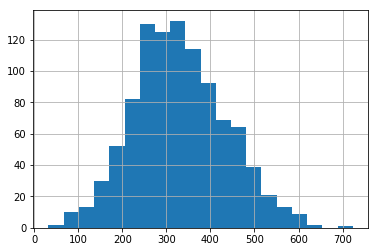

In [0]:
user_data['time_on_site'].hist(bins=20)

In [0]:
# Let's use crosstabulation to try to see what's going on
pd.crosstab(user_data['purchased'], user_data['time_on_site'])

time_on_site,32.5705946296963,47.33266073046423,75.76470036142581,79.82046504892494,79.91664511035054,85.24892914862048,88.5753912122328,88.87122208725708,90.32007729373674,97.498582039046,...,590.5976267047348,591.0320535794676,594.6345992791296,598.6861380949305,605.968269033064,609.586033883951,614.0454752248359,624.9937198825079,628.4637057066493,723.1576754505627
purchased,,,,,,,,,,,,,,,,,,,,,
False,1,1,1,0,1,1,1,1,1,1,...,0,0,0,0,0,1,0,0,1,0
True,0,0,0,1,0,0,0,0,0,0,...,1,1,1,1,1,0,1,1,0,1


In [0]:
idx = user_data['time_on_site'] < 0
user_data.loc[idx, 'time_on_site'] = np.NaN

In [0]:
# OK, that's not quite what we want
# Time is continuous! We need to put it in discrete buckets
# Pandas calls these bins, and pandas.cut helps make them

time_bins = pd.cut(user_data['time_on_site'], 5)  # 5 equal-sized bins
pd.crosstab(time_bins, user_data['purchased'])

purchased,False,True
time_on_site,,
"(31.88, 170.688]",43,12
"(170.688, 308.805]",199,190
"(308.805, 446.923]",202,205
"(446.923, 585.04]",78,59
"(585.04, 723.158]",3,9


In [0]:
# We can make this a bit clearer by normalizing (getting %)
pd.crosstab(time_bins, [user_data['purchased'], user_data['mobile']], normalize='index')

purchased              False               True           
mobile                 False     True      False     True 
time_on_site                                              
(31.88, 170.688]    0.018182  0.763636  0.000000  0.218182
(170.688, 308.805]  0.053985  0.457584  0.025707  0.462725
(308.805, 446.923]  0.167076  0.329238  0.100737  0.402948
(446.923, 585.04]   0.445255  0.124088  0.284672  0.145985
(585.04, 723.158]   0.250000  0.000000  0.500000  0.250000

In [0]:
# That seems counter to our hypothesis
# More time on the site can actually have fewer purchases

# But we know why, since we generated the data!
# Let's look at mobile and purchased
pd.crosstab(user_data['purchased'], user_data['mobile'], normalize='columns')

mobile,False,True
purchased,,
False,0.616,0.494667
True,0.384,0.505333


In [0]:
# Yep, mobile users are more likely to buy things
# But we're still not seeing the *whole* story until we look at all 3 at once

# Live/stretch goal - how can we do that?

pd.crosstab(time_bins, [user_data['mobile'], user_data['purchased']], normalize='all')

mobile              False         True        
purchased           False  True   False  True 
time_on_site                                  
(31.88, 170.688]    0.001  0.000  0.042  0.012
(170.688, 308.805]  0.021  0.010  0.178  0.180
(308.805, 446.923]  0.068  0.041  0.134  0.164
(446.923, 585.04]   0.061  0.039  0.017  0.020
(585.04, 723.158]   0.003  0.006  0.000  0.003

In [0]:
df = pd.DataFrame({'a': np.arange(1e5), 'b': 2 * np.arange(1e5)})

In [0]:
df['c'] = df['a'].apply(lambda x: x**2)

#OR

df['c2'] = df['a']**2

#they do the same thing, but check the timing

In [0]:
%%timeit
df['c'] = df['a'].apply(lambda x: x**2)

10 loops, best of 3: 31.5 ms per loop


In [0]:
%%timeit
df['c2'] = df['a']**2

1000 loops, best of 3: 1.75 ms per loop


In [0]:
df.head()

,a,b,c,c2
0,0.0,0.0,0.0,0.0
1,1.0,2.0,1.0,1.0
2,2.0,4.0,4.0,4.0
3,3.0,6.0,9.0,9.0
4,4.0,8.0,16.0,16.0


## Assignment - what's going on here?

Consider the data in `persons.csv` (already prepared for you, in the repo for the week). It has four columns - a unique id, followed by age (in years), weight (in lbs), and exercise time (in minutes/week) of 1200 (hypothetical) people.

Try to figure out which variables are possibly related to each other, and which may be confounding relationships.

In [0]:
df2 = pd.read_csv('https://raw.githubusercontent.com/AnikaZN/DS-Unit-1-Sprint-1-Dealing-With-Data/master/module4-databackedassertions/persons.csv', index_col='Unnamed: 0')

In [0]:
df2.head()

,age,weight,exercise_time
0,44,118,192
1,41,161,35
2,46,128,220
3,39,216,57
4,28,116,182


In [0]:
Person = namedtuple('person', ['age','weight', 'exercise_time'])

example_person = Person(28, 216, 190)
print(example_person)

person(age=28, weight=216, exercise_time=190)


In [0]:
df2.sample(n=10)

,Unnamed: 0,age,weight,exercise_time
946,946,47,140,47
494,494,50,176,41
455,455,69,113,144
120,120,70,162,100
753,753,80,127,48
583,583,80,127,30
643,643,64,191,96
117,117,61,218,65
779,779,41,165,147
749,749,33,117,108


In [0]:
weight_bins = pd.cut(df2['weight'], 5)
exercise_bins = pd.cut(df2['exercise_time'], 5)
age_bins = pd.cut(df2['age'], 9)

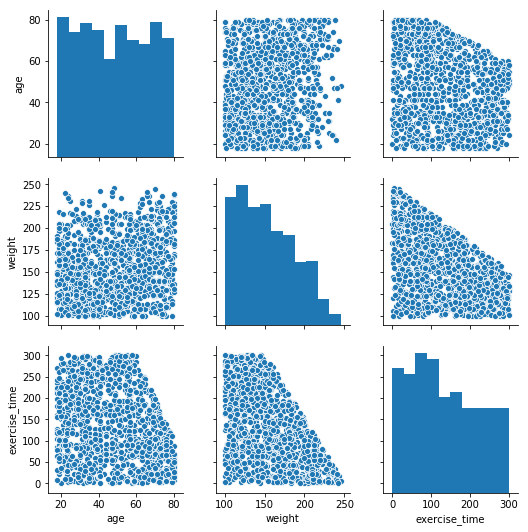

In [0]:
import seaborn as sns

sns.pairplot(df2)

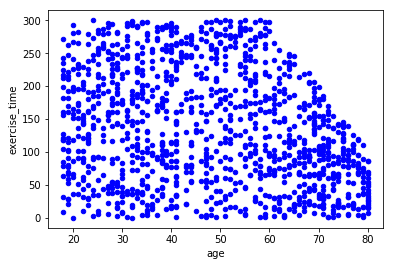

In [0]:
#Age vs. Exercise

df2.plot.scatter(x = 'age', y = 'exercise_time', c='b');

#around age 60, the maximum exercise time starts to decrease, whereas people from
#age 20-59 are highly varied - by age 80, the highest amount of exercise is about
#90 minutes

In [0]:
x = df2.age
y = df2.exercise_time

np.corrcoef(x,y)
print('Small negative correlation: -0.27382')

Small negative correlation: -0.27382


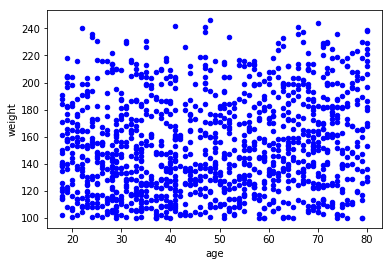

In [0]:
#Age vs. Weight

df2.plot.scatter(x = 'age', y = 'weight', c='b');

#there is a tiny bit of a trend which seems to indicate that the highest weights
#are from 20-30 and 70-80, but this data does not seem to have high correlation
#at all

In [0]:
x = df2.age
y = df2.weight

np.corrcoef(x,y)
print('Small positive correlation: 0.14417')

Small positive correlation: 0.14417


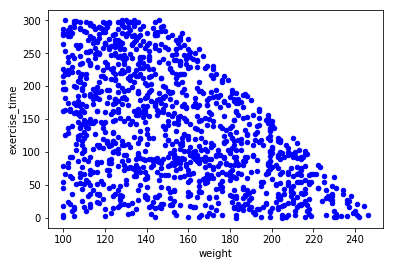

In [0]:
#Exercise vs. Weight

df2.plot.scatter(x = 'weight', y = 'exercise_time', c='b');

#similarly to the first graph, there is a fairly firm limit here
#(as weight increases, the max time spent exercising decreases)
#but the fact that there are people of every weight who do not
#exercise at all is interesting

In [0]:
x = df2.exercise_time
y = df2.weight

np.corrcoef(x,y)
print('Medium negative correlation: -0.47802')

Medium negative correlation: -0.47802


### Assignment questions

After you've worked on some code, answer the following questions in this text block:

1.  What are the variable types in the data? **These are all discrete variables.**
2.  What are the relationships between the variables? **There seems to be some correlation between "weight" and "exercise_time" especially, as well as a pretty insignificant relationship between "exercise_time" and "age" and almost no relationship between "age" and "weight".**
3.  Which relationships are "real", and which spurious? **I think that the correlation between "weight" and "exercise_time" is real, but I would definitely want to examine some potentially confounding variables which aren't represented here such as economic status or height, which could explain some of the seemingly erroneous points (such as people who don't exercise much at all but still don't weigh a lot).
The other correlations are not strong enough for me to even consider them as "spurious."**


## Stretch goals and resources

Following are *optional* things for you to take a look at. Focus on the above assignment first, and make sure to commit and push your changes to GitHub.

- [Spurious Correlations](http://tylervigen.com/spurious-correlations)
- [NIH on controlling for confounding variables](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4017459/)

Stretch goals:

- Produce your own plot inspired by the Spurious Correlation visualizations (and consider writing a blog post about it - both the content and how you made it)
- Pick one of the techniques that NIH highlights for confounding variables - we'll be going into many of them later, but see if you can find which Python modules may help (hint - check scikit-learn)

In [0]:
from google.colab import files
bitcoin = files.upload()

Saving multiTimeline (3).csv to multiTimeline (3).csv


In [0]:
from google.colab import files
net = files.upload()

Saving multiTimeline (4).csv to multiTimeline (4).csv


In [0]:
spurious1 = pd.read_csv('multiTimeline (3).csv')
spurious1.head()

,Category: All categories
Month,buy bitcoin: (United States)
2013-09,1
2013-10,2
2013-11,8
2013-12,8


In [0]:
spurious2 = pd.read_csv('multiTimeline (4).csv')
spurious2.head()

,Category: All categories
Month,Net neutrality: (United States)
2013-09,<1
2013-10,<1
2013-11,<1
2013-12,<1
